<a href="https://colab.research.google.com/github/cinthia005/Lab-PDI/blob/main/AF3_PDI_2062979.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Actividad Fundamental 3 - PDI**
Cinthia Janeth Pecina Hernández 2062979 IB

=== ANÁLISIS DE HISTOGRAMA - IMAGEN EN ESCALA DE GRISES ===
Dimensiones de la imagen: 720 x 485 píxeles
Rango de intensidades: 0 - 255

=== CÁLCULO DEL HISTOGRAMA ===
Histograma calculado con éxito

=== CREANDO VISUALIZACIÓN ===


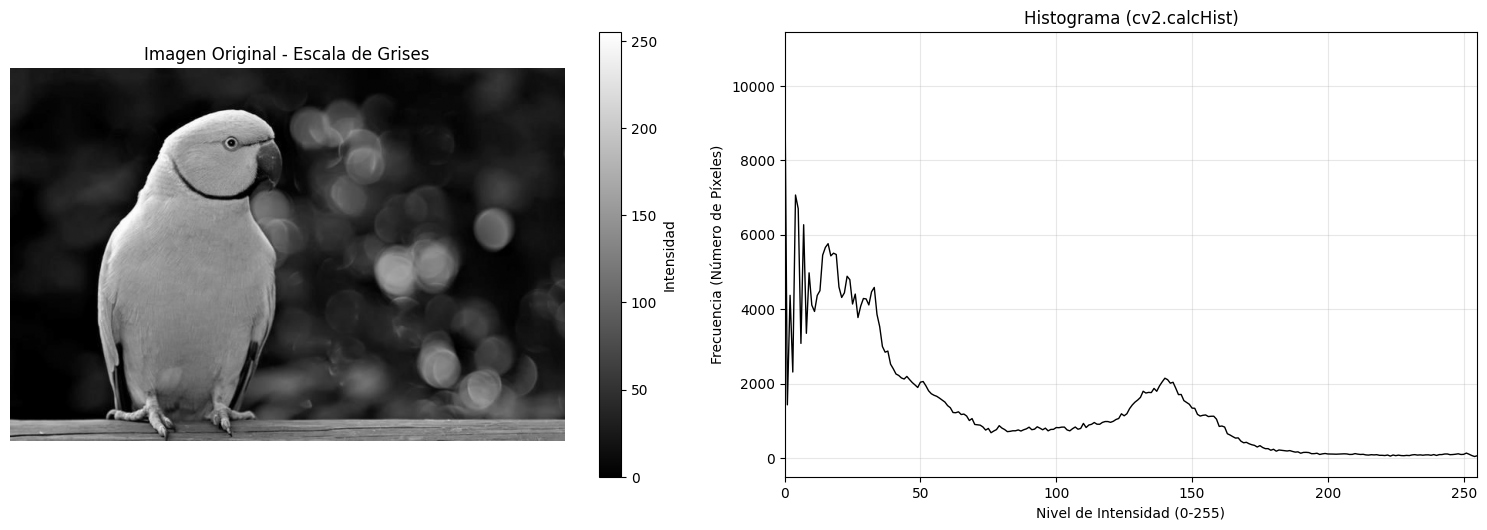


ANÁLISIS E INTERPRETACIÓN DEL HISTOGRAMA

DISTRIBUCIÓN DE INTENSIDADES:
- Zona oscura (0-85): 69.6% de los píxeles
- Zona media (86-169): 26.8% de los píxeles
- Zona brillante (170-255): 3.2% de los píxeles

DIAGNÓSTICO DE CONTRASTE:
- CONTRASTE MODERADO - Buena distribución tonal
- Desviación estándar: 55.9

DIAGNÓSTICO DE BRILLO:
- IMAGEN OSCURA - Posiblemente subexpuesta
- Intensidad media: 61.3

CARACTERÍSTICAS DE LA DISTRIBUCIÓN:
- Intensidad más frecuente: 0
- Número de píxeles en el pico: 10900
- ✓ Distribución diversa: buena variedad tonal

ARCHIVO GUARDADO: 'analisis_histograma.jpg'
✅ ANÁLISIS COMPLETADO


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ========== 1. PREPROCESAMIENTO ==========
print("=== ANÁLISIS DE HISTOGRAMA - IMAGEN EN ESCALA DE GRISES ===")

# Cargar la imagen en escala de grises
imagen_gris = cv2.imread('ave_2.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar que la imagen se cargó si no marcar error
if imagen_gris is None:
    print("Error: No se pudo cargar la imagen 'ave_2.jpg'")
    print("Asegúrate de que el archivo esté en la carpeta correcta")
    exit()

# Mostrar información básica
alto, ancho = imagen_gris.shape
print(f"Dimensiones de la imagen: {ancho} x {alto} píxeles")
print(f"Rango de intensidades: {imagen_gris.min()} - {imagen_gris.max()}")

# ========== 2. CÁLCULO DE HISTOGRAMA ==========
print("\n=== CÁLCULO DEL HISTOGRAMA ===")

# Método 1: Usando cv2.calcHist()
histograma_cv2 = cv2.calcHist([imagen_gris], [0], None, [256], [0, 256])

print("Histograma calculado con éxito")

# ========== 3. VISUALIZACIÓN ==========
print("\n=== CREANDO VISUALIZACIÓN ===")

# Crear figura con 4 subplots (2x2)
plt.figure(figsize=(15, 10))

# --- Subplot 1: Imagen original en escala de grises ---
plt.subplot(2, 2, 1)
plt.imshow(imagen_gris, cmap='gray')
plt.title('Imagen Original - Escala de Grises')
plt.axis('off')
plt.colorbar(label='Intensidad')

# --- Subplot 2: Histograma con cv2.calcHist() ---
plt.subplot(2, 2, 2)
plt.plot(histograma_cv2, color='black', linewidth=1)
plt.title('Histograma (cv2.calcHist)')
plt.xlabel('Nivel de Intensidad (0-255)')
plt.ylabel('Frecuencia (Número de Píxeles)')
plt.grid(True, alpha=0.3)
plt.xlim([0, 255])

plt.tight_layout()
plt.savefig('analisis_histograma.jpg', dpi=300, bbox_inches='tight')
plt.show()

# ========== 4. ANÁLISIS E INTERPRETACIÓN ==========
print("\n" + "="*60)
print("ANÁLISIS E INTERPRETACIÓN DEL HISTOGRAMA")
print("="*60)

# Cálculos para el análisis
total_pixeles = alto * ancho
porcentaje_oscuros = (np.sum(histograma_cv2[0:85]) / total_pixeles) * 100
porcentaje_medios = (np.sum(histograma_cv2[86:169]) / total_pixeles) * 100
porcentaje_brillantes = (np.sum(histograma_cv2[170:255]) / total_pixeles) * 100

# Análisis automático del histograma
print(f"\nDISTRIBUCIÓN DE INTENSIDADES:")
print(f"- Zona oscura (0-85): {porcentaje_oscuros:.1f}% de los píxeles")
print(f"- Zona media (86-169): {porcentaje_medios:.1f}% de los píxeles")
print(f"- Zona brillante (170-255): {porcentaje_brillantes:.1f}% de los píxeles")

# Diagnóstico del contraste
intensidad_std = np.std(imagen_gris)
if intensidad_std < 40:
    diagnostico_contraste = "BAJO CONTRASTE - La imagen tiene poca variación tonal"
elif intensidad_std < 70:
    diagnostico_contraste = "CONTRASTE MODERADO - Buena distribución tonal"
else:
    diagnostico_contraste = "ALTO CONTRASTE - Fuertes diferencias entre claros y oscuros"

# Diagnóstico del brillo
intensidad_media = np.mean(imagen_gris)
if intensidad_media < 85:
    diagnostico_brillo = "IMAGEN OSCURA - Posiblemente subexpuesta"
elif intensidad_media < 170:
    diagnostico_brillo = "BRILLO EQUILIBRADO - Exposición adecuada"
else:
    diagnostico_brillo = "IMAGEN BRILLANTE - Posiblemente sobreexpuesta"

print(f"\nDIAGNÓSTICO DE CONTRASTE:")
print(f"- {diagnostico_contraste}")
print(f"- Desviación estándar: {intensidad_std:.1f}")

print(f"\nDIAGNÓSTICO DE BRILLO:")
print(f"- {diagnostico_brillo}")
print(f"- Intensidad media: {intensidad_media:.1f}")

# Análisis de la distribución
pico_maximo = np.argmax(histograma_cv2)
frecuencia_pico = histograma_cv2[pico_maximo][0]

print(f"\nCARACTERÍSTICAS DE LA DISTRIBUCIÓN:")
print(f"- Intensidad más frecuente: {pico_maximo}")
print(f"- Número de píxeles en el pico: {int(frecuencia_pico)}")

if frecuencia_pico > total_pixeles * 0.3:
    print("- ⚠️  Distribución concentrada: posiblemente grandes áreas uniformes")
else:
    print("- ✓ Distribución diversa: buena variedad tonal")

print(f"\nARCHIVO GUARDADO: 'analisis_histograma.jpg'")
print("✅ ANÁLISIS COMPLETADO")